<a href="https://colab.research.google.com/github/resh1604/SIT742/blob/master/Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wget 

  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [0]:
import wget

link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2019/data/wine.json'
DataSet = wget.download(link_to_data)

link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2019/data/stopwords.txt'

DataSet = wget.download(link_to_data)

In [3]:
!ls

sample_data  stopwords.txt  wine.json


In [0]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
file = 'wine.json'

In [0]:
df = pd.read_json(file, orient='columns')
#df.head(10)
#print(df)
#print(df.to_json(orient='index', lines='True'))
df

In [0]:
#df = df[(df['points']=='NaN') & (df['price']=='NaN')]
#df = df.loc[~((df['points'] == NaN) | (df['price'] == NaN))]
df2 = df.dropna(subset=['price', 'points'])

In [0]:
#df2.describe()
#df2.describe(include ='all')
df2.points.describe()

In [0]:
df2.price.describe()

In [0]:
#df[df.points > 80].sort_values['variety'].head(10)
df2.nlargest(10, 'points')


In [0]:
df2['variety'].value_counts().head(10)  

In [0]:
#df3 = print(df2[['description']])
df3 = df2.loc[:,'description']

In [0]:
df3

In [0]:
df2.description.str.split(expand=True).stack().value_counts()

In [0]:
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.probability import *
from itertools import chain
#from tqdm import tqdm
import codecs

In [0]:
with open('stopwords.txt') as f:
    stop_words = f.read().splitlines()
stop_words = set(stop_words)

In [0]:
#df4 = df2['description'].str.cat(sep=', ')
#', '.join(df2.description)

In [19]:
df5 = df2.loc[:,'description'].head(20)
df5
df6 = df5.str.cat(sep=', ')
df6

"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's  already drinkable, although it will certainly be better from 2016., Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented., Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish., Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew., Blackberry and raspberry aromas show a typical Navarran whiff of green herbs and, in this case, horseradish. In the mouth, this is

In [20]:
# write your code here
# define your tokenize

'''raw = """The GSO finace group in  U.S.A. provided Cole with about
US$40,000,555.4 in funding, which accounts for 35.3% of Cole's revenue (i.e., AUD113.3m), 
as the ASX-listed firm battles for its survival.
Mr. Johnson said GSO's recapitalisation meant "the current shares are worthless".""" '''

re.split(r"\s+", df6)  
tokenizer = RegexpTokenizer(r"\w+(?:[-']\w+)?") 
tokens = tokenizer.tokenize(df6)
print(tokens)

['This', 'is', 'ripe', 'and', 'fruity', 'a', 'wine', 'that', 'is', 'smooth', 'while', 'still', 'structured', 'Firm', 'tannins', 'are', 'filled', 'out', 'with', 'juicy', 'red', 'berry', 'fruits', 'and', 'freshened', 'with', 'acidity', "It's", 'already', 'drinkable', 'although', 'it', 'will', 'certainly', 'be', 'better', 'from', '2016', 'Tart', 'and', 'snappy', 'the', 'flavors', 'of', 'lime', 'flesh', 'and', 'rind', 'dominate', 'Some', 'green', 'pineapple', 'pokes', 'through', 'with', 'crisp', 'acidity', 'underscoring', 'the', 'flavors', 'The', 'wine', 'was', 'all', 'stainless-steel', 'fermented', 'Pineapple', 'rind', 'lemon', 'pith', 'and', 'orange', 'blossom', 'start', 'off', 'the', 'aromas', 'The', 'palate', 'is', 'a', 'bit', 'more', 'opulent', 'with', 'notes', 'of', 'honey-drizzled', 'guava', 'and', 'mango', 'giving', 'way', 'to', 'a', 'slightly', 'astringent', 'semidry', 'finish', 'Much', 'like', 'the', 'regular', 'bottling', 'from', '2012', 'this', 'comes', 'across', 'as', 'rather'

In [0]:
#fd_1 = FreqDist(tokens)
#fd_1.most_common(25)

#ans10 = [x for x in tokens if > 5000]
#print(ans10)

ans10 = pd.Series(tokens).value_counts().sort_values(ascending=False)

#ans10 = pd.Series(tokens).value_counts().sort_values(ascending=False)
#ans11 = FreqDist(ans10)
#ans11

#newlist = [word for word in words if len(word) == 9]

#fish_list = [fish for fish in fish_tuple if fish != 'octopus']
#print(fish_list)

#number_list = [x ** 2 for x in range(10) if x % 2 == 0]
#print(number_list)

#newfd = sorted(fd_1, key=fd_1.get, reverse=True)[:10]
#newfd

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline 
import nltk
from nltk.corpus import reuters
nltk.download('punkt')
def tokenizeRawData(fileid):
    raw_article = reuters.raw(fileid).lower()
    tokenised_article = nltk.tokenize.word_tokenize(raw_article) 
    return (fileid, tokenised_article)
nltk.download('reuters')
reuters.fileids()
reuters.categories()
tokenized_reuters =  dict(tokenizeRawData(fileid) for fileid in reuters.fileids())
tokenized_reuters

In [0]:
# To print all key and vaule in the tokenized_reruers dictionary
for key, value in tokenized_reuters.items() :
    print (key, value)
tokenized_reuters['training/1684']
for k, v in tokenized_reuters.items():
    #For the v in the each k, we will  keep alphabetic characters and alphanumberic characters
    tokenized_reuters[k] = [word for word in v if word.isalnum()]

tokenized_reuters['training/1684']
#You will find the ',' and numbers which are not deleted comparing with above sample

In [75]:
from __future__ import division
from itertools import chain

words = list(chain.from_iterable(tokenized_reuters.values()))

#Convert the words type from list to set
#because the set will automaticlly delete all repeated elements in the list.
vocab = set(words)

lexical_diversity = len(words)/len(vocab)


print ("Total number of tokens: ", len(words), "\nVocabulary size (Type): ",len(vocab),
"\nLexical diversity: ", lexical_diversity, "\nThe Lexical diversity means that words occur on averge about", round(lexical_diversity),"times each.")

Total number of tokens:  1310704 
Vocabulary size (Type):  29165 
Lexical diversity:  44.9409909137665 
The Lexical diversity means that words occur on averge about 45 times each.


In [0]:
for wordList in tokenized_reuters.values():
       for word in wordList:
           yield word

In [76]:
from nltk.probability import *
fd_1 = FreqDist(words)
fd_1.most_common(25)
#fd_1.plot(25, cumulative=True)
words_2 = list(chain.from_iterable([set(value) for value in tokenized_reuters.values()]))
fd_2 = FreqDist(words_2)
fd_2.most_common(25)

[('of', 7621),
 ('the', 6950),
 ('to', 6911),
 ('said', 6784),
 ('and', 6761),
 ('in', 6580),
 ('a', 6222),
 ('lt', 6069),
 ('for', 5415),
 ('mln', 4845),
 ('it', 4788),
 ('dlrs', 4193),
 ('from', 4006),
 ('on', 3987),
 ('its', 3761),
 ('is', 3569),
 ('by', 3511),
 ('year', 3416),
 ('at', 3392),
 ('with', 3253),
 ('pct', 3212),
 ('cts', 3068),
 ('inc', 3017),
 ('vs', 2982),
 ('be', 2927)]

In [0]:
import wget

link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Jupyter/data/stopwords_en.txt'

DataSet = wget.download(link_to_data)

In [59]:
!ls

sample_data  stopwords_en.txt  stopwords.txt  wine.json


In [0]:
stopwords = []
with open('stopwords_en.txt') as f:
    stopwords = f.read().splitlines()
stopwords[:20]

In [78]:
tokenized_reuters_1 = {}
for fileid in reuters.fileids():
    tokenized_reuters_1[fileid] = [w for w in tokenized_reuters[fileid] if w not in stopwords]
tokenized_reuters_1

print(len(tokenized_reuters_1))

10788


In [63]:
#Convert the list stopwords to set stopwordsSet
stopwordsSet = set(stopwords)

#The length of stopwords list
print(len(stopwords))

#The length of stopwordsSet set
print(len(stopwordsSet))

#To delete all stopswords in the reuters
for fileid in reuters.fileids():
    tokenized_reuters[fileid] = [w for w in tokenized_reuters[fileid] if w not in stopwordsSet]

#The length of processed tokenized_retuers
print(len(tokenized_reuters))

571
570
10788


In [79]:
#To combine all tokenized_reuters without stopwords in a list using the chain method
words_3 = list(chain.from_iterable(tokenized_reuters.values()))
fd_3 = FreqDist(words_3)
list(vocab - set(fd_3.keys()))

[]

In [80]:
fd_3.most_common(10)

[('the', 69245),
 ('of', 36749),
 ('to', 36275),
 ('in', 29217),
 ('and', 25616),
 ('said', 25381),
 ('a', 24723),
 ('mln', 18598),
 ('vs', 14332),
 ('for', 13420)]

In [0]:
nltk.Text(reuters.words()).concordance('mln')
nltk.Text(reuters.words()).concordance('net')

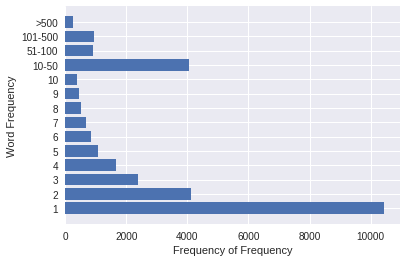

In [68]:
#we have defined fd_3 = FreqDist(words_3), it means that ffd will show FreqDist about the processed tokenized_reuters
ffd = FreqDist(fd_3.values())

#Import pylab package for data virtualization
from pylab import *

#To create a list include 14 element, '0'.
y = [0]*14

#For top 10 Freq, we will show each of them 
#For therest Freq, we will catagorize them by 10-50, 51-100, 101-500 and > 500.
#You can add a new code cell to run the command 'ffd'. Then, you can understand the below statements block deeply.
for k, v in ffd.items():
     if k <= 10:
        y[k-1] = v
     elif k >10 and k <= 50:
        y[10] =  y[10] + v
     elif k >50 and k <= 100:
        y[11] =  y[11] + v
     elif k > 100 and k <= 500:
        y[12] =  y[12] + v
     else:
        y[13] =  y[13] + v
                
#covert a integer list to a string list
ytks =list(map(str, range(1, 11))) 

#append is uedd to add its argument as a single element to the end of a list. 
ytks.append('10-50')
ytks.append('51-100')
ytks.append('101-500')
ytks.append('>500')

# generate integer from 1 to 14        
x = range(1, 15)

#Center the bars on the y positions
barh(x,y, align='center')

#x, A list of positions at which ticks should be placed
#ytks, A list of explicit labels to place at the given locs.
yticks(x, ytks)

#To define x axial and y axial lables.
xlabel('Frequency of Frequency')
ylabel('Word Frequency')

#To show the grid line on the diagram
grid(True)

In [0]:
lessFreqWords = set(fd_3.hapaxes())

#You also can use  "lessFreqWords = set([k for k, v in fdist.items() if v < 2])" to replace "lessFreqWords = set(fd_3.hapaxes())"

#You can uncomment below codes for using the mp.pool parallelizing the execution of a function.
#pool = mp.Pool(4)
#tokenized_reuters = dict(pool.map(removeLessFreqWords, reuters.fileids()))

In [0]:
#To define a function for removing LessFreqWords
def removeLessFreqWords(fileid):
    return (fileid, [w for w in tokenized_reuters[fileid] if w not in lessFreqWords])

tokenized_reuters = dict(removeLessFreqWords(fileid) for fileid in reuters.fileids())

In [71]:
import numpy as np

words = list(chain.from_iterable(tokenized_reuters.values()))
vocab = set(words)

print ("Vocabulary size: ",len(vocab))
print ("Total number of tokens: ", len(words))
print ("Lexical diversity: ", lexical_diversity)
print ("Total number of articles:", len(tokenized_reuters))

lens = [len(value) for value in tokenized_reuters.values()]
print('The lens list for each article are', lens)

#For mean,max, min and std,you can check those concepts on https://www.ucd.ie/t4cms/Mean%20and%20Standard%20Deviation.pdf
print ("Average document length:", np.mean(lens))
print ("Maximun document length:", np.max(lens))
print ("Minimun document length:", np.min(lens))
print ("Standard deviation of document length:", np.std(lens))

Vocabulary size:  18239
Total number of tokens:  746942
Lexical diversity:  44.9409909137665
Total number of articles: 10788
The lens list for each article are [362, 61, 99, 96, 95, 99, 199, 29, 60, 307, 50, 124, 139, 46, 236, 55, 61, 59, 218, 141, 69, 58, 92, 112, 60, 49, 51, 94, 55, 55, 20, 143, 358, 366, 127, 14, 92, 49, 107, 53, 101, 119, 94, 43, 21, 46, 417, 88, 52, 61, 107, 60, 215, 41, 72, 15, 82, 12, 69, 63, 24, 70, 16, 111, 32, 17, 36, 57, 18, 37, 14, 28, 23, 24, 21, 101, 49, 20, 214, 43, 106, 15, 20, 162, 83, 98, 16, 40, 35, 17, 17, 28, 46, 15, 16, 16, 101, 12, 33, 108, 11, 37, 52, 12, 49, 37, 71, 24, 82, 21, 42, 307, 66, 0, 114, 57, 40, 20, 95, 50, 41, 30, 17, 464, 94, 26, 14, 12, 20, 15, 19, 19, 14, 40, 128, 12, 58, 72, 156, 31, 76, 233, 34, 134, 74, 18, 123, 24, 97, 15, 21, 20, 121, 69, 12, 29, 48, 19, 45, 49, 37, 19, 37, 15, 64, 55, 246, 18, 17, 201, 79, 18, 47, 52, 49, 16, 18, 74, 28, 16, 32, 87, 48, 100, 305, 17, 50, 105, 28, 47, 149, 15, 17, 44, 59, 87, 216, 56, 92, 62